<a href="https://colab.research.google.com/github/azmirizkya/Data-Analysis-with-Colab/blob/main/Goodreads_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GOODREADS ANALYSIS**

**IMPORT LIBRARY AND FILE**

In [47]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jealousleopard/goodreadsbooks")

print("Path to dataset files:", path)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(path + '/books.csv', on_bad_lines='skip')

Path to dataset files: /root/.cache/kagglehub/datasets/jealousleopard/goodreadsbooks/versions/2


**DATA UNDERSTANDING**

This dataset contains the detailed information about the books, primarily.

1. bookID : A unique Identification number for each book.

2. title : The name under which the book was published.

3. authors : Names of the authors of the book. Multiple authors are delimited with -.

4. average_rating : The average rating of the book received in total.

5. isbn : Another unique number to identify the book, the International Standard Book Number.

6. isbn13 : A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.

7. language_code : Helps understand what is the primary language of the book. For instance, eng is standard for English.

8. num_pages : Number of pages the book contains.

9. ratings_count : Total number of ratings the book received.

10. text_reviews_count : Total number of written text reviews the book received.

11. publication_date : Date when the book was first published.

12. publisher : The name of the publisher.

**PROBLEMS**

1. What are the highest-rated books on Goodreads?
2. Which authors have the most books on Goodreads and which authors are the most highly rated?
3. Which publisher have the highest-rated books?
4. What were the most popular books in each decade?

# DATA PREPARATION

In [128]:
df.describe()

,bookID,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,publication_year,decade
count,11123.000000,11123.000000,11123.000000,1.112300e+04,11123.000000,11121,11121.000000,11121.000000
mean,21310.856963,3.934075,336.405556,1.794285e+04,542.048099,2000-08-29 03:05:33.099541504,2000.170668,1995.696430
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1900-01-01 00:00:00,1900.000000,1900.000000
25%,10277.500000,3.770000,192.000000,1.040000e+02,9.000000,1998-07-17 00:00:00,1998.000000,1990.000000
50%,20287.000000,3.960000,299.000000,7.450000e+02,47.000000,2003-03-01 00:00:00,2003.000000,2000.000000
75%,32104.500000,4.140000,416.000000,5.000500e+03,238.000000,2005-10-01 00:00:00,2005.000000,2000.000000
max,45641.000000,5.000000,6576.000000,4.597666e+06,94265.000000,2020-03-31 00:00:00,2020.000000,2020.000000
std,13094.727252,0.350485,241.152626,1.124992e+05,2576.619589,NaN,8.246168,8.475691


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


There's no missing value

But we need to convert publication_date to datetime dtype

In [117]:
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookID              11123 non-null  int64         
 1   title               11123 non-null  object        
 2   authors             11123 non-null  object        
 3   average_rating      11123 non-null  float64       
 4     num_pages         11123 non-null  int64         
 5   ratings_count       11123 non-null  int64         
 6   text_reviews_count  11123 non-null  int64         
 7   publication_date    11121 non-null  datetime64[ns]
 8   publisher           11123 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 782.2+ KB


In [43]:
df.shape

(11123, 12)

The dataset have 11.123 rows and 12 columns

In [44]:
df.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown


In [59]:
df.nunique()

,0
bookID,11123
title,10348
authors,6639
average_rating,209
num_pages,997
ratings_count,5294
text_reviews_count,1822
publication_date,3679
publisher,2290


The nunique() code indicates the number of unique values for each column in dataset.

In [53]:
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [bookID, title, authors, average_rating, isbn, isbn13, language_code,   num_pages, ratings_count, text_reviews_count, publication_date, publisher]
Index: []


There's no data duplicate in this dataset

**Data Reduction**

include dropping the columns that are irrelevant

In [54]:
df.drop(['isbn', 'isbn13', 'language_code'], axis=1,inplace=True)

In [55]:
df.head()

,bookID,title,authors,average_rating,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,2690,41428,164,9/13/2004,Scholastic


# DATA PREPROCESSING

Check the outliers

<Axes: ylabel='publication_date'>

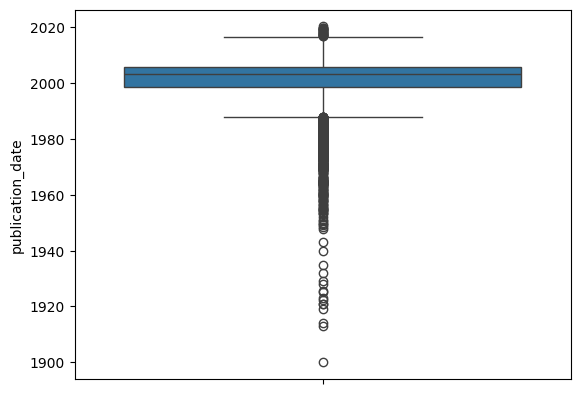

In [123]:
sns.boxplot(df['publication_date'])

Remove outliers

In [140]:
Q1 = df['publication_date'].quantile(0.25)
Q3 = df['publication_date'].quantile(0.75)
IQR = Q3 - Q1
IQR

Timedelta('2633 days 00:00:00')

In [141]:
print(df['publication_date'].min())
print(df['publication_date'].max())

1900-01-01 00:00:00
2020-03-31 00:00:00


In [142]:
df = df[~((df['publication_date'] < (Q1 - 1.5 * IQR)) | (df['publication_date'] > (Q3 + 1.5 * IQR)))]

print(df['publication_date'].min())
print(df['publication_date'].max())

1987-09-28 00:00:00
2016-06-30 00:00:00


<Axes: ylabel='publication_date'>

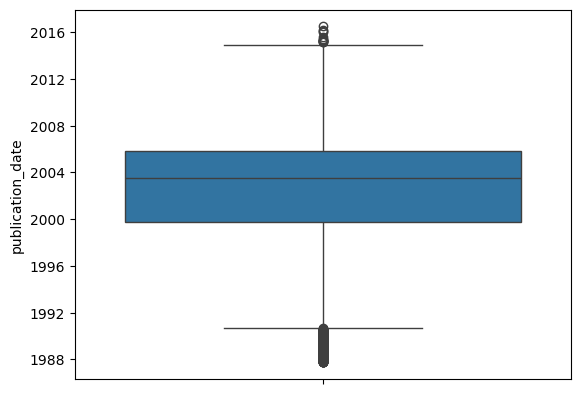

In [146]:
sns.boxplot(df['publication_date'])

# EDA

# **1. What are the highest-rated books on Goodreads?**

In [105]:
# Sort the dataset by average rating in descending order
highest_rated_books = df.sort_values('average_rating', ascending=False)

# Display the top 30 highest-rated books
print(highest_rated_books[['title', 'authors', 'average_rating']].head(30))

                                                   title  \
624    Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...   
9893   His Princess Devotional: A Royal Encounter Wit...   
4788   The Diamond Color Meditation: Color Pathway to...   
9324                  Tyrannosaurus Wrecks (Stanley  #1)   
9720       The Irish Anatomist: A Study of Flann O'Brien   
4933   Bulgakov's the Master and Margarita: The Text ...   
6775   Delwau Duon: Peintiadau Nicholas Evans = Symph...   
9282   Oliver Wendell Holmes in Paris: Medicine  Theo...   
786                    Willem de Kooning: Late Paintings   
4125   Zone of the Enders: The 2nd Runner Official St...   
5023   The Complete Theory Fun Factory: Music Theory ...   
9847   The American Campaign: U.S. Presidential Campa...   
8544        Fanning the Flame: Bible  Cross  and Mission   
5648   Colossians and Philemon: A Critical and Exeget...   
5647                                 Winchester Shotguns   
855    Literature Circle Guide: Bridge t

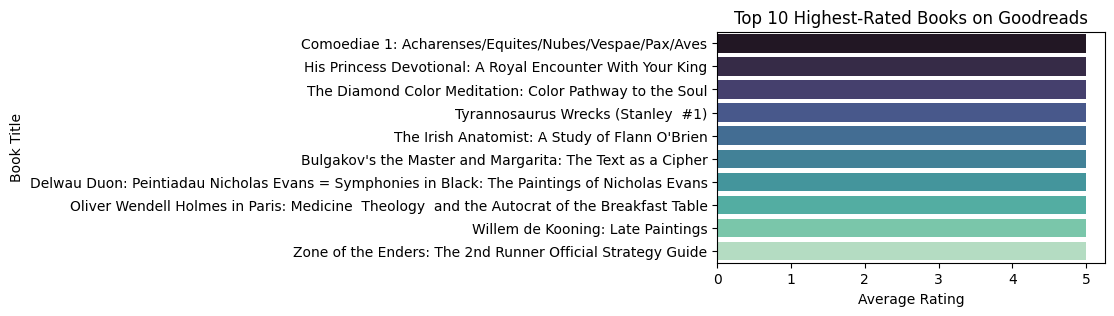

In [171]:
plt.figure(figsize=(5, 3))
sns.barplot(x='average_rating', y='title', data=highest_rated_books.head(10), palette='mako', hue='publisher', legend=False)
plt.title('Top 10 Highest-Rated Books on Goodreads')
plt.xlabel('Average Rating')
plt.ylabel('Book Title')
plt.show()

Based on barplot above, top 10 highest-rated books on goodreads are :

1. Comoediae 1: Acharenses/Equites/Nubes/Vespae/Pax/Aves

2. His Princess Devotional: A Royal Encounter With Your King

3. The Diamond Color Meditation: Color Pathway to the Soul

4. Tyrannosaurus Wrecks (Stanley #1)

5. The Irish Anatomist: A Study of Flann O'Brien

6. Bulgakov's the Master and Margarita: The Text as a Cipher

7. Delwau Duon: Peintiadau Nicholas Evans = Symphhonies in Black: The Paintings of Nicholas Evans

8. Oliver Wendell Holmes in Paris: Medicine Theology and the Autocrat of the Breakfast Table

9. Willem de Kooning: Late Paintings

10. Zone of the Enders: The 2nd Runner Official Strategy Guide



# **2. Which authors have the most books on Goodreads and which authors are the most highly rated?**

In [108]:
author_counts = df['authors'].value_counts()
top_authors = author_counts.head(10)
print(top_authors)

authors
Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Piers Anthony       30
Sandra Brown        29
Mercedes Lackey     29
Dick Francis        28
Terry Pratchett     23
Name: count, dtype: int64


<ipython-input-167-aa7f81abab16>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_authors.index, x=top_authors.values, palette='mako')


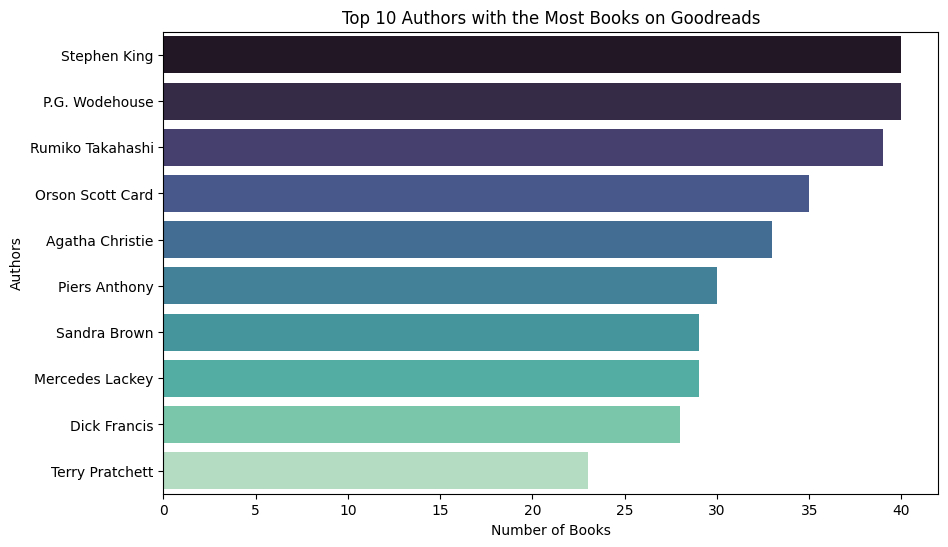

In [167]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values, palette='mako')
plt.xlabel('Number of Books')
plt.ylabel('Authors')
plt.title('Top 10 Authors with the Most Books on Goodreads')
plt.show()

Based on barplot above, authors who have the most books on Goodreads are Stephen King, P.G. Wodehouse, Rumiko Takahashi, Orson Scott Card, Agatha Christie, Piers Anthony, Sandra Brown, Mercedes Lackey, Dick Francis, and Terry Pratchett    

In [111]:
author_ratings = df.groupby('authors')['average_rating'].mean().sort_values(ascending=False)
top_rated_authors = author_ratings.head(10)
print(top_rated_authors)

authors
Keith Donohue                                           5.0
John  Diamond                                           5.0
R. McL. Wilson                                          5.0
Nicholas    Evans/Rhonda  Evans                         5.0
James E. Campbell                                       5.0
Aristophanes/F.W. Hall/W.M. Geldart                     5.0
Chris    Green/Chris Wright/Paul Douglas Gardner        5.0
Sheri Rose Shepherd                                     5.0
Laura Driscoll/Alisa Klayman-Grodsky/Eric     Weiner    5.0
Todd Davis/Marc Frey                                    5.0
Name: average_rating, dtype: float64


<ipython-input-112-9a5e98ff4549>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_authors.index, y=top_rated_authors.values, palette='mako')


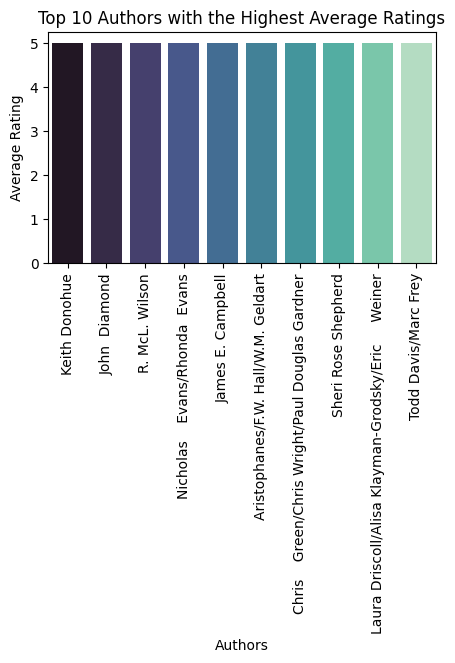

In [112]:
plt.figure(figsize=(5, 3))
sns.barplot(x=top_rated_authors.index, y=top_rated_authors.values, palette='mako')
plt.xticks(rotation=90)
plt.xlabel('Authors')
plt.ylabel('Average Rating')
plt.title('Top 10 Authors with the Highest Average Ratings')
plt.show()

The author with the highest rating are Keith Donohue, John  Diamond, R. McL. Wilson, Nicholas Evans/Rhonda Evans, James E. Campbell, Aristophanes/F.W. Hall/W.M. Geldart, Chris Green/Chris Wright/Paul Douglas Gardner, Sheri Rose Shepherd, Laura Driscoll/Alisa Klayman-Grodsky/Eric Weiner, Todd Davis/Marc Frey                 

# **3. Which publisher have the highest-rated books?**

In [116]:
publisher_ratings = df.groupby('publisher')['average_rating'].mean().sort_values(ascending=False).head(10)
print(publisher_ratings)

publisher
Boosey & Hawkes Inc                5.0
Schirmer Mosel                     5.0
Chartwell Books                    5.0
Vantage Press                      5.0
Y Lolfa                            5.0
Square One Publishers              5.0
Courage Books                      5.0
Academica Press                    5.0
University Press of New England    5.0
Raintree                           5.0
Name: average_rating, dtype: float64


<ipython-input-115-9853481c2853>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_ratings.index, y=publisher_ratings.values, palette='mako')


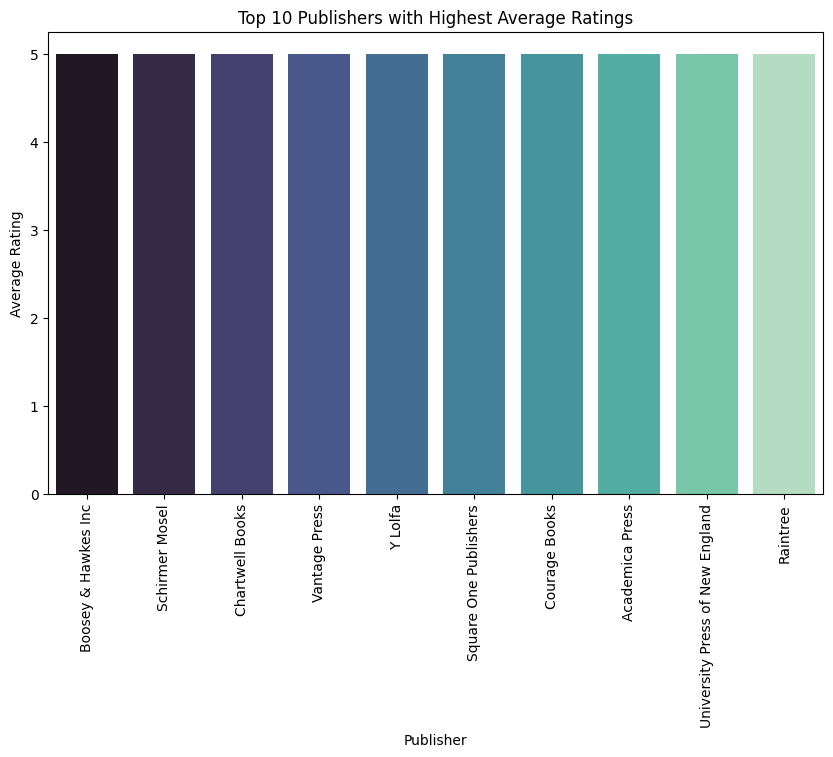

In [115]:
plt.figure(figsize=(10,6))
sns.barplot(x=publisher_ratings.index, y=publisher_ratings.values, palette='mako')
plt.xticks(rotation=90)
plt.xlabel('Publisher')
plt.ylabel('Average Rating')
plt.title('Top 10 Publishers with Highest Average Ratings')
plt.show()

The publisher with the highest rating are Boosey & Hawkes Inc, Schirmer Mosel, Chartwell Books, Vantage Press, Y Lolfa, Square One Publishers, Courage Books,
Academica Press, University Press of New England, Raintree                     

# **4. What were the most popular books in each decade?**

In [153]:
df['decade'] = (df['publication_date'].dt.year // 10) * 10

# Group by decade and get the most popular book in each decade based on ratings count
popular_books_by_decade = df.groupby('decade').apply(lambda x: x.nlargest(1, 'ratings_count'))
popular_books_by_decade = popular_books_by_decade.reset_index(drop=True)

<ipython-input-153-b14c565a1819>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  popular_books_by_decade = df.groupby('decade').apply(lambda x: x.nlargest(1, 'ratings_count'))


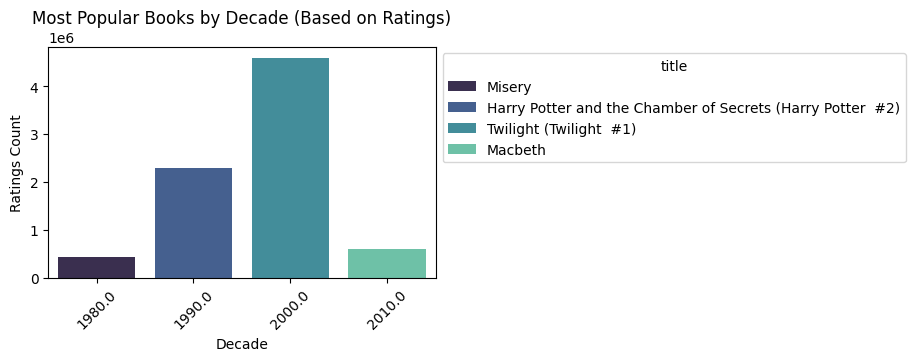

In [175]:
plt.figure(figsize=(5, 3))
ax = sns.barplot(x='decade', y='ratings_count', data=popular_books_by_decade, hue='title', palette='mako', legend=True, dodge=False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.title('Most Popular Books by Decade (Based on Ratings)')
plt.xlabel('Decade')
plt.ylabel('Ratings Count')
plt.show()

Most Popular Title Books by Decade based on Ratings are Misery, Harry Potter and the Chamber of Secrets (Harry Potter #2), Twilight (Twilight #1) and Macbeth